# Tourism Experience Analytics

1. Data Cleaning 

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load datasets
transaction = pd.read_excel("Transaction.xlsx")
user = pd.read_excel("User.xlsx")  # If manageable
item = pd.read_excel("Updated_Item.xlsx")
mode = pd.read_excel("Mode.xlsx")
type_df = pd.read_excel("Type.xlsx")
country = pd.read_excel("Country.xlsx")
region = pd.read_excel("Region.xlsx")
continent = pd.read_excel("Continent.xlsx")

# 🔧 Fix VisitMode merge issue
transaction["VisitMode"] = transaction["VisitMode"].astype(str)
mode["VisitModeId"] = mode["VisitModeId"].astype(str)
mode["VisitMode"] = mode["VisitMode"].astype(str)

# 🧩 Merge datasets
data = transaction.merge(item, on="AttractionId", how="left")
data = data.merge(mode, left_on="VisitMode", right_on="VisitModeId", how="left")
data = data.merge(user, on="UserId", how="left")  # Skip if too large
data = data.merge(type_df, on="AttractionTypeId", how="left")

# ✅ Merge country and get RegionId
if "RegionId" not in country.columns:
    print("RegionId missing in country dataset. Available columns:", country.columns)
else:
    data = data.merge(country[["CountryId", "Country", "RegionId"]], on="CountryId", how="left")

# ✅ Merge region and get ContinentId
if "RegionId" not in data.columns:
    print("RegionId missing after country merge. Available columns:", data.columns)
else:
    data = data.merge(region[["RegionId", "Region", "ContinentId"]], on="RegionId", how="left")

# ✅ Merge continent
if "ContinentId" not in data.columns:
    print("ContinentId missing after region merge. Available columns:", data.columns)
else:
    data = data.merge(continent[["ContinentId", "Continent"]], on="ContinentId", how="left")

# 🧼 Handle missing values
data.fillna("Unknown", inplace=True)

# 🔠 Encode categorical features
label_cols = ["VisitMode", "AttractionType", "Country", "Region", "Continent"]
for col in label_cols:
    if col in data.columns:
        data[col] = LabelEncoder().fit_transform(data[col].astype(str))
    else:
        print(f"Column {col} not found in data. Skipping encoding.")

# 📏 Normalize ratings
if "Rating" in data.columns:
    scaler = MinMaxScaler()
    data["Rating"] = scaler.fit_transform(data[["Rating"]])
else:
    print("Rating column missing. Cannot normalize.")

# ✅ Final check
print("Final columns:", data.columns)
print(data.head())
data.to_excel("cleaned_tourism_data.xlsx", index=False)

RegionId missing after country merge. Available columns: Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode_x',
       'AttractionId', 'Rating', 'AttractionCityId', 'AttractionTypeId',
       'Attraction', 'AttractionAddress', 'VisitModeId', 'VisitMode_y',
       'ContinentId', 'RegionId_x', 'CountryId', 'CityId', 'AttractionType',
       'Country', 'RegionId_y'],
      dtype='object')
Column VisitMode not found in data. Skipping encoding.
Column Region not found in data. Skipping encoding.
Final columns: Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode_x',
       'AttractionId', 'Rating', 'AttractionCityId', 'AttractionTypeId',
       'Attraction', 'AttractionAddress', 'VisitModeId', 'VisitMode_y',
       'ContinentId', 'RegionId_x', 'CountryId', 'CityId', 'AttractionType',
       'Country', 'RegionId_y', 'Continent'],
      dtype='object')
   TransactionId  UserId  VisitYear  VisitMonth VisitMode_x  AttractionId  \
0              3   70456 

C:\Users\only1\AppData\Local\Temp\ipykernel_19436\45203443.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("Unknown", inplace=True)


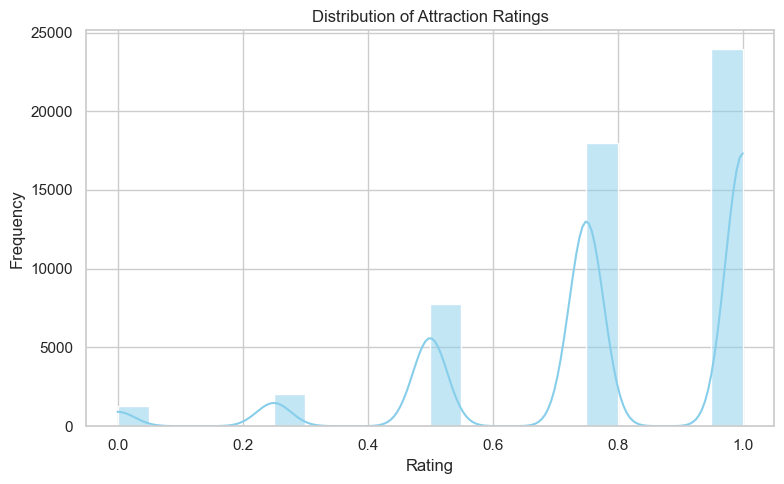

C:\Users\only1\AppData\Local\Temp\ipykernel_19436\2524581246.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=visit_mode_col, data=data, palette="Set2" ,order=data[visit_mode_col].value_counts().index , legend="false")


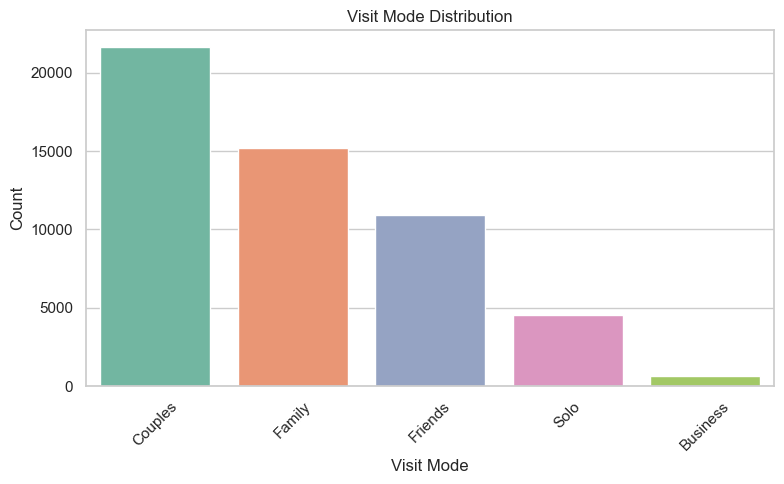

C:\Users\only1\AppData\Local\Temp\ipykernel_19436\2524581246.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Rating", y="AttractionType", data=avg_rating.sort_values("Rating", ascending=False), palette="viridis")


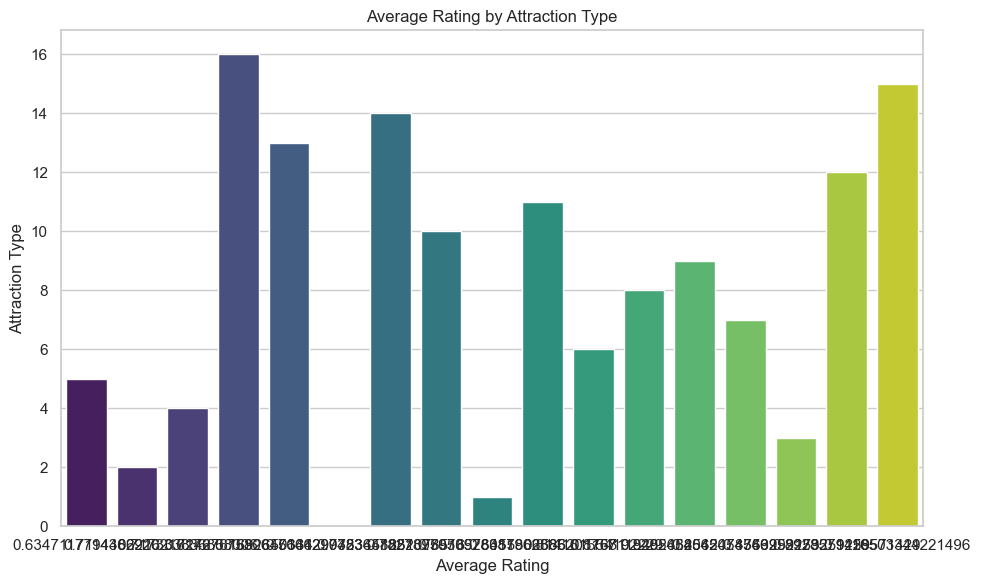

C:\Users\only1\AppData\Local\Temp\ipykernel_19436\2524581246.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_attractions.values, y=top_attractions.index, palette="magma" )


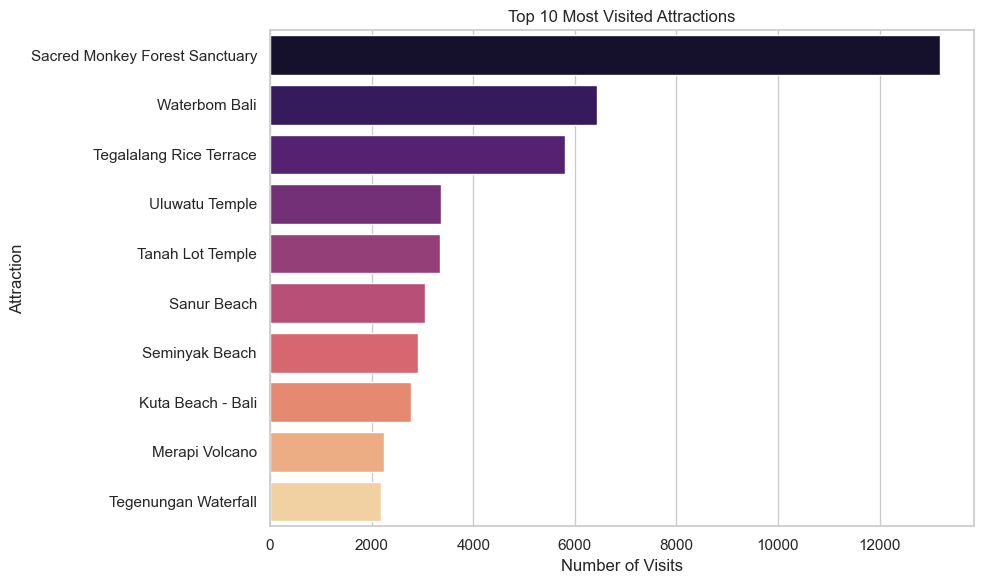

C:\Users\only1\AppData\Local\Temp\ipykernel_19436\2524581246.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Continent", y="Rating", data=data, palette="coolwarm")


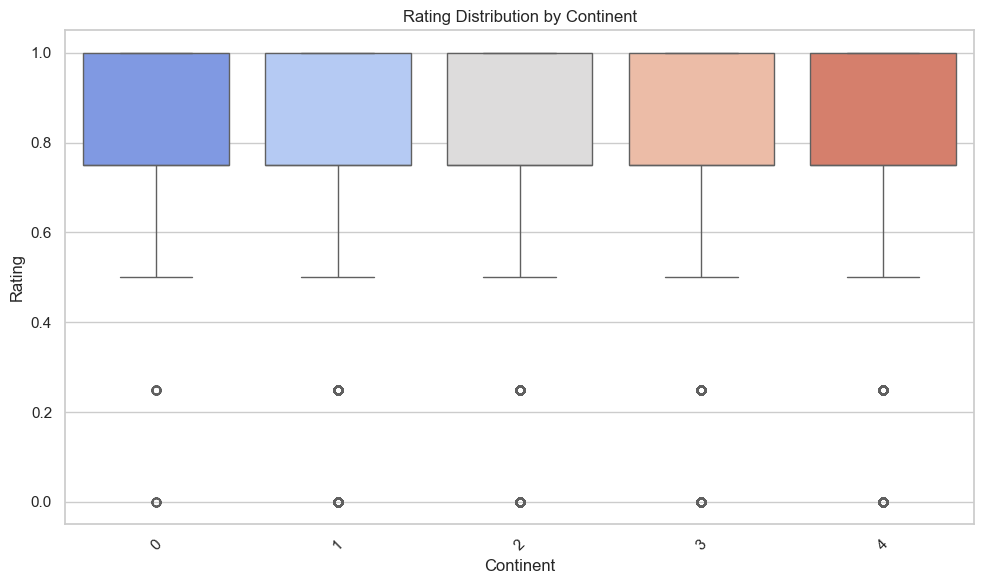

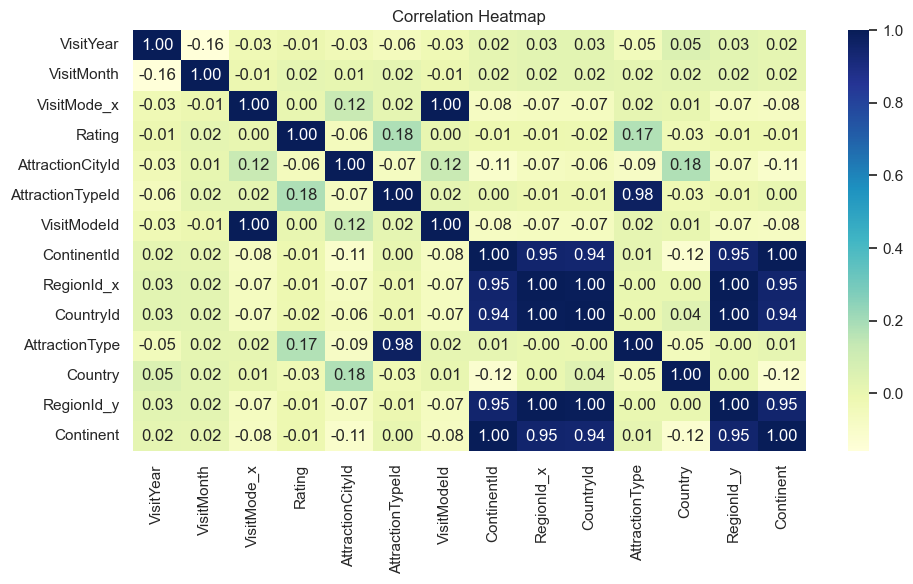

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned dataset
data = pd.read_excel("cleaned_tourism_data.xlsx")  # Replace with your actual file path

# Set style
sns.set(style="whitegrid")

# 🔍 Helper: Check for column existence
def safe_column(df, options):
    for col in options:
        if col in df.columns:
            return col
    raise KeyError(f"None of the columns {options} found in DataFrame.")

# 1. Distribution of Ratings
if "Rating" in data.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data["Rating"], bins=20, kde=True, color="skyblue")
    plt.title("Distribution of Attraction Ratings")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# 2. Visit Mode Distribution
try:
    visit_mode_col = safe_column(data, ["VisitMode", "VisitMode_y", "VisitModeId"])
    plt.figure(figsize=(8, 5))
    sns.countplot(x=visit_mode_col, data=data, palette="Set2" ,order=data[visit_mode_col].value_counts().index , legend="false")
    plt.title("Visit Mode Distribution")
    plt.xlabel("Visit Mode")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
except KeyError:
    print("Visit mode column not found. Skipping visit mode plot.")

# 3. Average Rating by Attraction Type
if "AttractionType" in data.columns and "Rating" in data.columns:
    plt.figure(figsize=(10, 6))
    avg_rating = data.groupby("AttractionType")["Rating"].mean().reset_index()
    sns.barplot(x="Rating", y="AttractionType", data=avg_rating.sort_values("Rating", ascending=False), palette="viridis")
    plt.title("Average Rating by Attraction Type")
    plt.xlabel("Average Rating")
    plt.ylabel("Attraction Type")
    plt.tight_layout()
    plt.show()

# 4. Top 10 Most Visited Attractions
if "Attraction" in data.columns:
    plt.figure(figsize=(10, 6))
    top_attractions = data["Attraction"].value_counts().head(10)
    sns.barplot(x=top_attractions.values, y=top_attractions.index, palette="magma" )
    plt.title("Top 10 Most Visited Attractions")
    plt.xlabel("Number of Visits")
    plt.ylabel("Attraction")
    plt.tight_layout()
    plt.show()

# 5. Ratings by Continent
if "Continent" in data.columns and "Rating" in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Continent", y="Rating", data=data, palette="coolwarm")
    plt.title("Rating Distribution by Continent")
    plt.xlabel("Continent")
    plt.ylabel("Rating")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 6. Correlation Heatmap (Numerical Features Only)
plt.figure(figsize=(10, 6))
numeric_cols = data.select_dtypes(include=["int64", "float64"]).drop(columns=["UserId", "AttractionId", "TransactionId"], errors="ignore")
if not numeric_cols.empty:
    corr = numeric_cols.corr()
    sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns available for correlation heatmap.")

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load cleaned dataset
data = pd.read_excel("cleaned_tourism_data.xlsx")  # Replace with your actual file path

# 🧼 Drop non-numeric columns
drop_cols = ["TransactionId", "UserId", "AttractionId", "Attraction", "AttractionAddress"]
data = data.drop(columns=drop_cols, errors="ignore")

# 🔠 Encode categorical columns if needed
categorical_cols = data.select_dtypes(include="object").columns.tolist()
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# 📏 Normalize Rating
if "Rating" in data.columns:
    scaler = MinMaxScaler()
    data["Rating"] = scaler.fit_transform(data[["Rating"]])
else:
    raise ValueError("Rating column missing from dataset.")

# ✅ Define features and target
X = data.drop(columns=["Rating"])
y = data["Rating"]

# 📊 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔍 Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 📈 Evaluate
y_pred = model.predict(X_test)
print("✅ Regression Results")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

✅ Regression Results
R² Score: -0.007945245411591584
Mean Squared Error: 0.05933119711422671


🧠 4. Classification – Predict Visit Mod

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 🧼 Drop irrelevant columns
drop_cols = ["TransactionId", "UserId", "AttractionId", "Attraction", "AttractionAddress", "Rating"]
data = data.drop(columns=[col for col in drop_cols if col in data.columns])

# 🔠 Encode object-type columns
for col in data.select_dtypes(include="object").columns:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# 🔧 Recover VisitMode if missing
if "VisitMode" not in data.columns:
    if "VisitMode_y" in data.columns:
        data["VisitMode"] = data["VisitMode_y"]
    elif "VisitModeId" in data.columns:
        data["VisitMode"] = data["VisitModeId"]
    else:
        raise ValueError("VisitMode column not found in any form.")

# ✅ Define features and target
X = data.drop(columns=["VisitMode"])
y = data["VisitMode"]

# 📊 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔍 Train model
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

# 📈 Evaluate
y_pred = clf.predict(X_test)
print("✅ Classification Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

✅ Classification Results
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      4290
           2       1.00      1.00      1.00      3079
           3       1.00      1.00      1.00      2171
           4       1.00      1.00      1.00       916

    accuracy                           1.00     10586
   macro avg       1.00      1.00      1.00     10586
weighted avg       1.00      1.00      1.00     10586



5. Recommendation System
Collaborative Filtering (User-Item Matrix)


In [41]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# Load cleaned dataset
data = pd.read_excel("cleaned_tourism_data.xlsx")  # Replace with your actual path

# ✅ Required columns for both recommendation systems
required_cols = ["UserId", "Attraction", "Rating", "AttractionType", "Country", "Continent"]
optional_cols = ["Region"]  # Region is optional

# ✅ Check for missing required columns
missing = [col for col in required_cols if col not in data.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

# ✅ Use only available optional columns
available_optional = [col for col in optional_cols if col in data.columns]

# ✅ Final content-based feature columns
content_cols = ["AttractionType", "Country", "Continent"] + available_optional

In [42]:
# Create user-item matrix
user_item_matrix = data.pivot_table(index="UserId", columns="Attraction", values="Rating", fill_value=0)

# Compute similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Recommend attractions for a given user
def recommend_collaborative(user_id, top_n=5):
    if user_id not in user_similarity_df.index:
        return f"User {user_id} not found."

    # Get similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:]
    top_user = similar_users.index[0]

    # Attractions rated by top similar user but not by target user
    user_rated = user_item_matrix.loc[user_id]
    top_user_rated = user_item_matrix.loc[top_user]
    recommendations = top_user_rated[(user_rated == 0) & (top_user_rated > 0)].sort_values(ascending=False)

    return recommendations.head(top_n).index.tolist()

# Example
print("Collaborative Recommendations for User 101:", recommend_collaborative(101))

Collaborative Recommendations for User 101: User 101 not found.


In [44]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# Load cleaned dataset
data = pd.read_excel("cleaned_tourism_data.xlsx")  # Replace with your actual path

# ✅ Define core and optional content columns
core_cols = ["AttractionType", "Country", "Continent"]
optional_cols = ["Region"]
content_cols = core_cols + [col for col in optional_cols if col in data.columns]

# 🔠 Encode only available columns
for col in content_cols:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# ✅ Build attraction profile matrix
attraction_profiles = data.groupby("Attraction")[content_cols].mean()

# ✅ Compute similarity between attractions
attraction_similarity = cosine_similarity(attraction_profiles)
attraction_similarity_df = pd.DataFrame(attraction_similarity, index=attraction_profiles.index, columns=attraction_profiles.index)

# ✅ Recommend similar attractions
def recommend_content_based(attraction_name, top_n=5):
    if attraction_name not in attraction_similarity_df.index:
        return f"Attraction '{attraction_name}' not found."
    similar_attractions = attraction_similarity_df[attraction_name].sort_values(ascending=False)[1:]
    return similar_attractions.head(top_n).index.tolist()

# ✅ Example
print("Content-Based Recommendations for 'Sanur Beach':", recommend_content_based("Sanur Beach"))

Content-Based Recommendations for 'Sanur Beach': ['Tegenungan Waterfall', 'Kuta Beach - Bali', 'Nusa Dua Beach', 'Seminyak Beach', 'Merapi Volcano']


In [ ]:
# streamlit_app.py
